In [1]:
# Housing Price Predictor  Started by Yeldos on March 25, 2025  
#Goal: Predict median house prices using features like income, age, and room count.

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

data = fetch_california_housing(as_frame=True)
myDF = data.frame
myDF.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: >

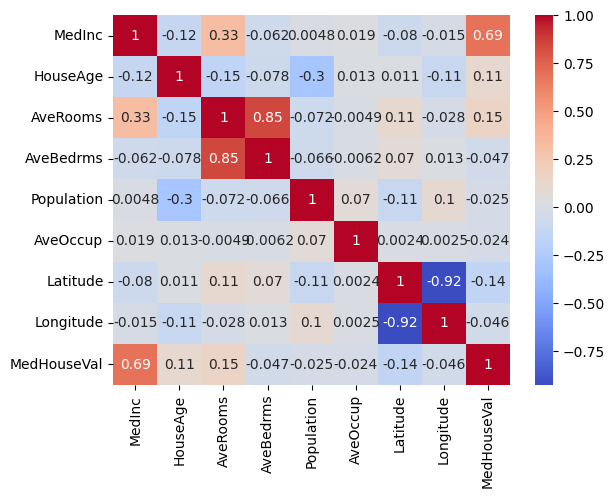

In [3]:
sns.heatmap(myDF.corr(), annot=True, cmap='coolwarm')

In [4]:
#we see that the house values have a correalation with median income, house age, and
#average number of rooms. So we will use those as the features.

In [5]:
X = myDF[['MedInc', 'HouseAge', 'AveRooms']]  #predictors
y = myDF['MedHouseVal'] #target

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#using linear regression model for our data
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_linear = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred_linear))
print("MSE:", mean_squared_error(y_test, y_pred_linear))
#result with linear regression

R² Score: 0.49717158850807075
MSE: 0.6589108649336336


In [7]:
#now trying the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

Random Forest R²: 0.5431156225241381
Random Forest MSE: 0.5987053902623737


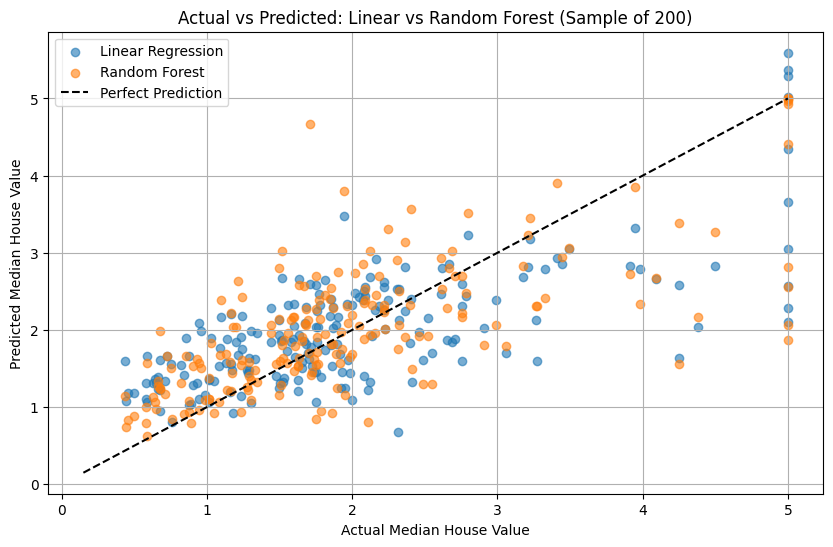

In [8]:
#comparing how accurate those two models were

# sample 200 random indices
sample_idx = np.random.choice(len(y_test), size=200, replace=False)

# apply the sample to predictions and actual values
y_test_sample = y_test.iloc[sample_idx]
y_pred_linear_sample = y_pred_linear[sample_idx]
y_pred_rf_sample = y_pred_rf[sample_idx]

# plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_sample, y_pred_linear_sample, alpha=0.6, label='Linear Regression')
plt.scatter(y_test_sample, y_pred_rf_sample, alpha=0.6, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Prediction')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted: Linear vs Random Forest (Sample of 200)")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
## Summary

#This project explored the California Housing dataset to predict median house values using basic features such as income, house age, and number of rooms. We started with a linear regression model (R² ≈ 0.49), and improved performance using a Random Forest Regressor (R² ≈ X.XX).

#While the dataset lacked high-signal features like location quality or neighborhood-level data, this project provided a solid introduction to:
#- Data exploration and visualization
#- Feature selection
#- Supervised regression modeling
#- Model evaluation and comparison